# Imports

In [1]:
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from importlib import reload
from common import baseclasses
from NearFieldOptics.Materials import material_types
from NearFieldOptics import Materials as M
#reload(M)

<material_types.TabulatedMaterialFromFile.__init__>:
	Loading tabulated material data from file "Bi2Se3_epsilon.pickle"...
<material_types.TabulatedMaterialFromFile.__init__>:
	Loading tabulated material data from file "PMMA_epsilon.pickle"...
<material_types.TabulatedMaterialFromFile.__init__>:
	Loading tabulated material data from file "sio2_300nm_extracted_epsilon_cone_A=2a.pickle"...
<material_types.TabulatedMaterialFromFile.__init__>:
	Loading tabulated material data from file "TaS2_eps_230K.csv"...
<material_types.TabulatedMaterialFromFile.__init__>:
	Loading tabulated material data from file "TaS2_eps_30K.csv"...
<material_types.TabulatedMaterialFromFile.__init__>:
	Loading tabulated material data from file "Erik_BSTS_epsilon.pickle"...
<material_types.TabulatedMaterialFromFile.__init__>:
	Loading tabulated material data from file "VO2_295K.csv"...
<material_types.TabulatedMaterialFromFile.__init__>:
	Loading tabulated material data from file "VO2_360K.csv"...
<material_types.Ta

# Drude metal with decreasing damping rate (e.g. metal-to-superconductor)

<plotting>:
	Registered colormaps "Warm" and "Warm_r"...
<plotting>:
	Registered colormaps "vanheum" and "vanheum_r"...
<plotting>:
	Registered colormaps "NT-MDT" and "NT-MDT_r"...
<plotting>:
	Registered colormaps "rainbow" and "rainbow_r"...
<plotting>:
	Registered colormaps "jingdi" and "jingdi_r"...
<plotting>:
	Registered colormaps "Halcyon" and "Halcyon_r"...
<plotting>:
	Registered colormaps "Cold" and "Cold_r"...
<plotting>:
	Registered colormaps "Sky" and "Sky_r"...
<plotting>:
	Registered colormaps "Gwyddion.net" and "Gwyddion.net_r"...
<plotting>:
	Registered colormaps "BlueRed" and "BlueRed_r"...
<plotting>:
	Registered colormaps "vanheum3" and "vanheum3_r"...
<plotting>:
	Registered colormaps "vanheum2" and "vanheum2_r"...


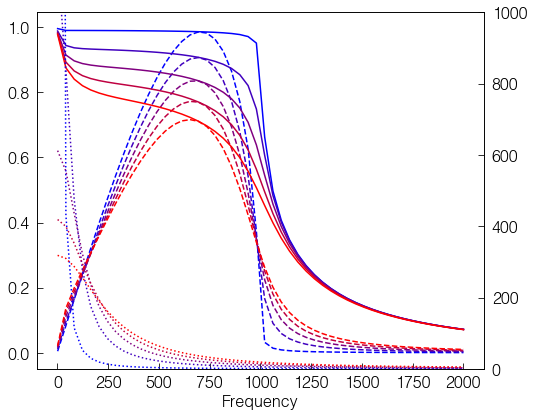

In [2]:
from common.plotting import bluered_colors
import warnings
warnings.filterwarnings('error')
wp=1e3
freqs=np.linspace(1,2*wp)

get_sigma = lambda eps: (eps-1)*freqs/(4*np.pi*1j)

N=5
cs=bluered_colors(N)
gammas=np.linspace(wp/100,wp/4,N)
f=plt.figure(figsize=(8,6))
ax1=plt.gca()
ax2=plt.twinx()
for g in gammas:
    c=next(cs)
    m=M.IsotropicMaterial(drude_params=(wp,g))
    R=m.reflection_p(freqs,angle=0)
    plt.sca(ax1)
    np.abs(R).plot(color=c)
    np.imag(R).plot(color=c,ls='--')
    
    e=m.epsilon(freqs)
    sigma=get_sigma(e).real
    plt.sca(ax2)
    plt.plot(freqs,sigma,color=c,ls=':')
    plt.ylim(0,1000)

In [3]:
rp=m.reflection_p(freqs,angle=30)
rp=m.reflection_p(rp,angle=30)

# STO phonon shift spectroscopy

In [4]:
fs=np.linspace(600,1000,500)

def reflection_STO(f0,gamma=2):
    
    LOs=[(1*f0**2,f0,gamma)]
    m1=M.IsotropicMaterial(eps_lps=LOs,eps_infinity=2)
    r=m1.reflection_p(fs,angle=60)
    
    return r

def plot_STO_shift(df=10,gamma=2):
    
    f0=630
    f1=f0; f2=f1+df
    r1=reflection_STO(f1,gamma=gamma)
    r2=reflection_STO(f2,gamma=gamma)
    
    plt.figure(figsize=(12,4))
    
    plt.subplot(121)
    np.abs(r1).plot(color='b')
    np.abs(r2).plot(color='b',ls='--')
    plt.twinx()
    plt.plot(fs,np.unwrap(np.angle(r1)),color='r')
    plt.plot(fs,np.unwrap(np.angle(r2)),color='r',ls='--')
    
    plt.subplot(122)
    np.abs(r2/r1).plot(color='b')
    #plt.ylim(0,3)
    plt.ylabel('Amplitude ratio',color='b')
    plt.twinx()
    plt.plot(fs,np.angle(r2/r1),color='r')
    plt.ylabel('Relative phase',color='r',rotation=270,labelpad=30)
    plt.ylim(-np.pi,np.pi)
    
    plt.subplots_adjust(wspace=.3)
    plt.show()

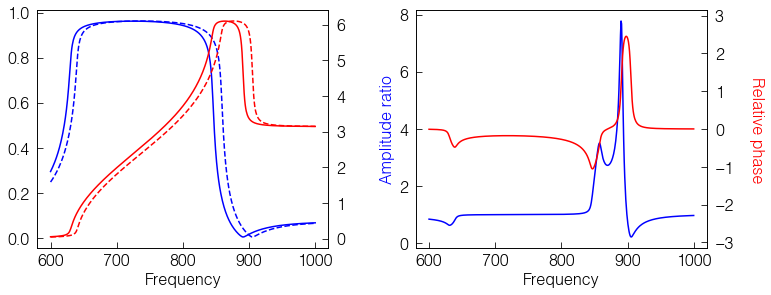

In [5]:
plot_STO_shift(df=10,gamma=5)

In [6]:
#%matplotlib notebook
interact(plot_STO_shift,
         df=widgets.FloatSlider(min=0, max=20, step=.1, continuous_update=False,value=10),
         gamma=widgets.FloatSlider(min=1, max=20, step=.1, continuous_update=False,value=2));

DeprecationWarning: `ipykernel.pylab.backend_inline` is deprecated, directly use `matplotlib_inline.backend_inline`